In [1]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
#Leemos el CSV
zonaprop = pd.read_csv('../../train.csv')

In [3]:
zonaprop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

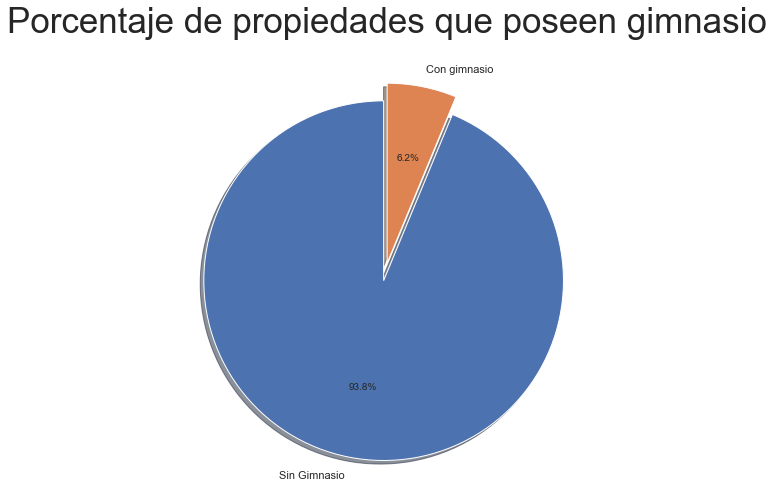

In [4]:
#Obtenemos las cantidades de propiedades con gimnasio
conGimnasio = (zonaprop[zonaprop['gimnasio'] == 1]).gimnasio.count()
sinGimnasio = (zonaprop[zonaprop['gimnasio'] == 0]).gimnasio.count()

sizes = [sinGimnasio, conGimnasio]
nombres = ['Sin Gimnasio','Con gimnasio']

# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Porcentaje de propiedades que poseen gimnasio', fontsize=35)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
plt.show()

Text(0, 0.5, 'Precio (en millones de pesos)')

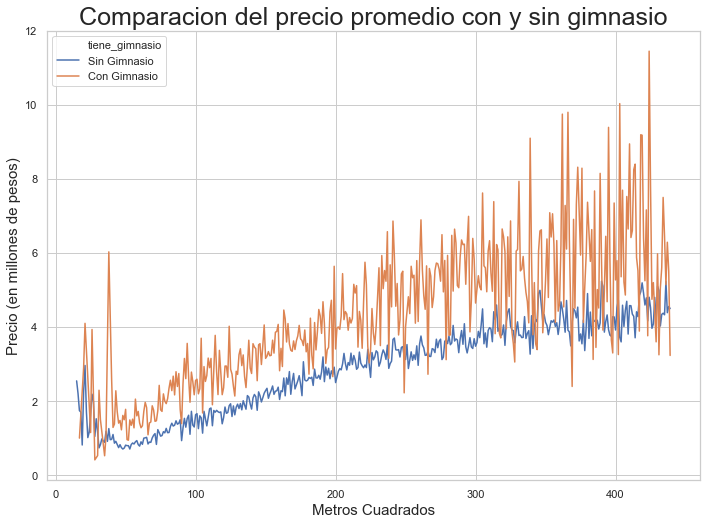

In [7]:
gimnasio_df = zonaprop.groupby(['metrostotales','gimnasio']).mean()[['precio']].reset_index()
gimnasio_df['tiene_gimnasio'] = 'Sin Gimnasio'
gimnasio_df.loc[gimnasio_df['gimnasio'] == 1,'tiene_gimnasio'] = 'Con Gimnasio'

gimnasio_df['precio'] = gimnasio_df['precio']/1000000

#Relacion metros cuadrados / precio promedio entre propiedades con y sin piscina

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.lineplot(x="metrostotales", y="precio", data=gimnasio_df, hue="tiene_gimnasio", color='blue')

ax = plt.gca()
ax.set_title("Comparacion del precio promedio con y sin gimnasio", fontsize=25)
ax.set_xlabel("Metros Cuadrados",fontsize=15)
ax.set_ylabel("Precio (en millones de pesos)", fontsize=15)

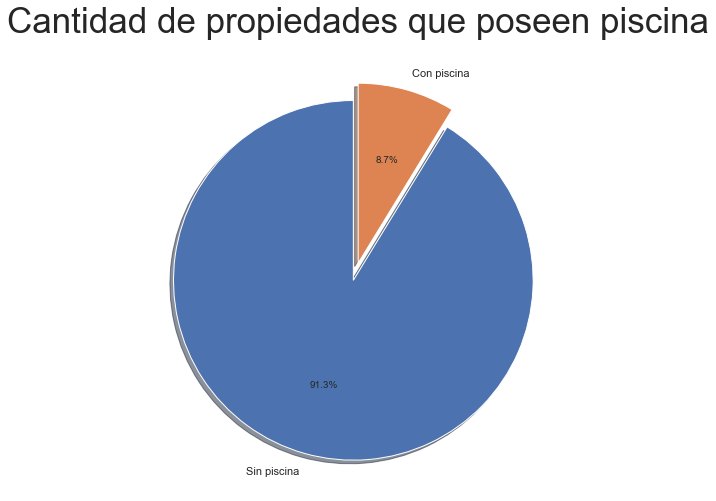

In [8]:
#Obtenemos las cantidades de propiedades con piscina
conPiscina = (zonaprop[zonaprop['piscina'] == 1]).gimnasio.count()
sinPiscina = (zonaprop[zonaprop['piscina'] == 0]).gimnasio.count()

sizes = [sinPiscina, conPiscina]
nombres = ['Sin piscina','Con piscina']

# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Cantidad de propiedades que poseen piscina', fontsize=35)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
plt.show()

Text(0, 0.5, 'Precio (en millones de pesos)')

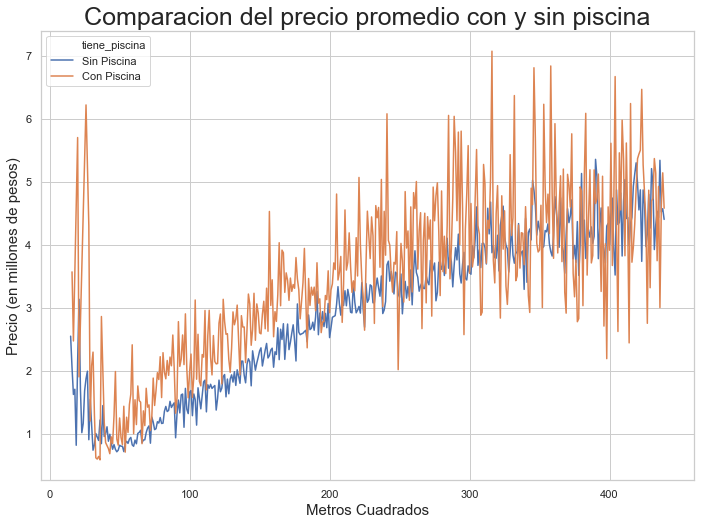

In [10]:
piscina_df = zonaprop.groupby(['metrostotales','piscina']).mean()[['precio']].reset_index()
piscina_df['tiene_piscina'] = 'Sin Piscina'
piscina_df.loc[piscina_df['piscina'] == 1,'tiene_piscina'] = 'Con Piscina'

piscina_df['precio'] = piscina_df['precio']/1000000

#Relacion metros cuadrados / precio promedio entre propiedades con y sin piscina

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.lineplot(x="metrostotales", y="precio", data=piscina_df, hue="tiene_piscina", color='blue')
ax = plt.gca()
ax.set_title("Comparacion del precio promedio con y sin piscina", fontsize=25)
ax.set_xlabel("Metros Cuadrados",fontsize=15)
ax.set_ylabel("Precio (en millones de pesos)", fontsize=15)

In [11]:
zonaprop['habitaciones'].value_counts()

3.0     121887
2.0      57808
4.0      25068
1.0       5069
5.0       4596
6.0       1669
7.0        539
8.0        398
10.0       316
9.0        179
Name: habitaciones, dtype: int64

Text(0, 0.5, 'Cantidad de propiedades')

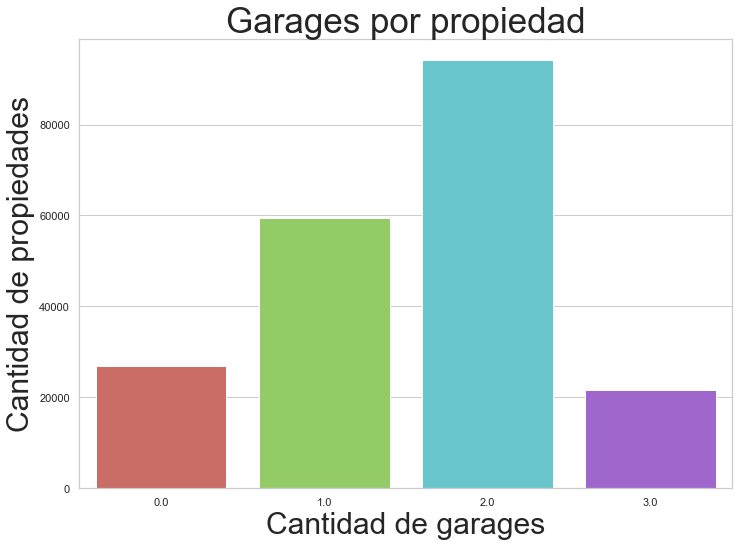

In [12]:
## GRAFICAMOS LA CANTIDAD DE GARAGES QUE TIENEN LAS PROPIEDADES.
#zonaprop['garages'].value_counts()
#2.0    94167
#1.0    59464
#0.0    26926
#3.0    21678

cantidad_de_garages_por_propiedad = list([0, 1, 2, 3])
garagesdf = zonaprop[zonaprop['garages'].isin(cantidad_de_garages_por_propiedad)]
garagesdf['garages'].value_counts()

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="garages", data=garagesdf, palette="hls")
g.set_title("Garages por propiedad", fontsize=35)
g.set_xlabel("Cantidad de garages", fontsize=30)
g.set_ylabel("Cantidad de propiedades", fontsize=30)

Text(0, 0.5, 'Cantidad de propiedades')

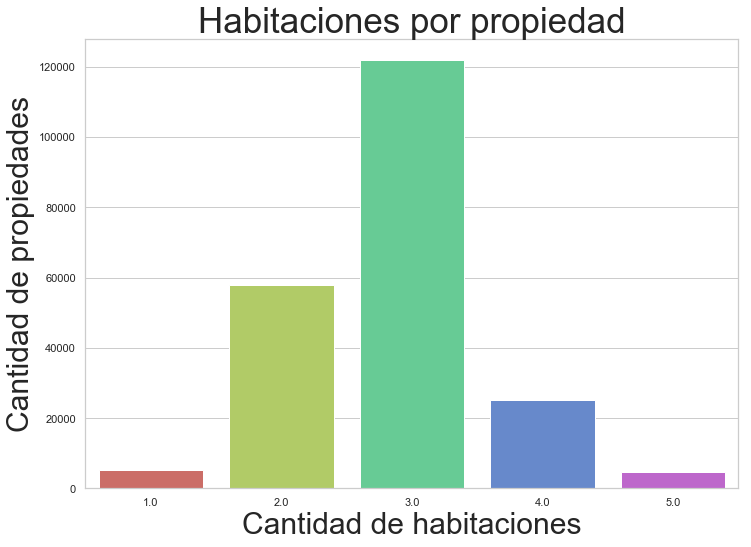

In [13]:
## GRAFICAMOS LA CANTIDAD DE HABITACIONES QUE TIENEN LAS PROPIEDADES.
#zonaprop['habitaciones'].value_counts()
#3.0     121887
#2.0      57808
#4.0      25068
#1.0       5069
#5.0       4596

cantidad_de_habitaciones_por_propiedad = list([0, 1, 2, 3, 4, 5])
habitacionesdf = zonaprop[zonaprop['habitaciones'].isin(cantidad_de_habitaciones_por_propiedad)]
habitacionesdf['garages'].value_counts()

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="habitaciones", data=habitacionesdf, palette="hls")
g.set_title("Habitaciones por propiedad", fontsize=35)
g.set_xlabel("Cantidad de habitaciones", fontsize=30)
g.set_ylabel("Cantidad de propiedades", fontsize=30)

In [14]:
zonaprop['ciudad'].value_counts()

Querétaro                              12646
Benito Juárez                          11014
Zapopan                                10360
San Luis Potosí                         7925
Mérida                                  7162
Monterrey                               6946
Alvaro Obregón                          6633
Cuauhtémoc                              6614
Naucalpan de Juárez                     6554
Miguel Hidalgo                          5795
Atizapán de Zaragoza                    5783
Tlalpan                                 5721
Huixquilucan                            5718
Coyoacán                                5293
Puebla                                  4636
Guadalajara                             4006
San Andrés Cholula                      3805
Cancún                                  3779
Cuernavaca                              3775
Chihuahua                               3757
Tlalnepantla de Baz                     3588
Cuautitlán Izcalli                      3408
Tlajomulco

Text(0, 0.5, 'Cantidad de propiedades')

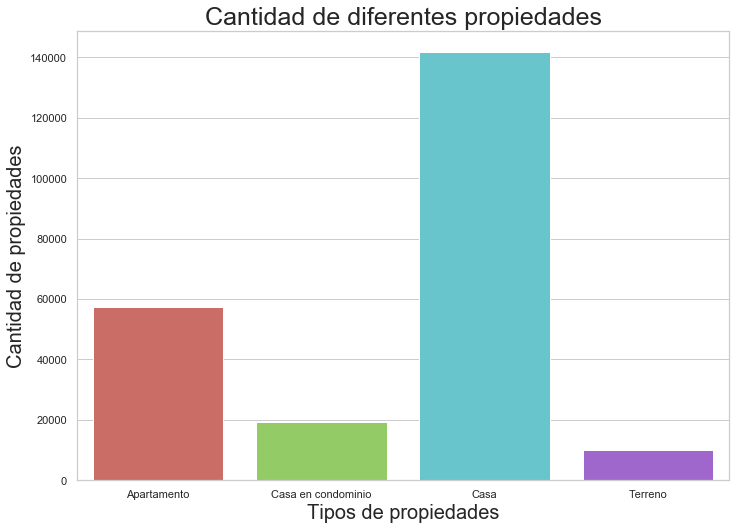

In [15]:
## GRAFICAMOS LOS DISTINTOS TIPOS DE PROPIEDADES.
#zonaprop['tipodepropiedad'].value_counts()
#Casa                             141717
#Apartamento                       57341
#Casa en condominio                19297
#Terreno                            9945
#Local Comercial                    3055
#Oficina comercial                  1741
#Bodega comercial                   1406
#Edificio                           1396
#Terreno comercial                  1326

tiposDePropiedad = list(["Casa", "Apartamento", "Casa en condominio", "Terreno"])
tiposDePropiedadf = zonaprop[zonaprop['tipodepropiedad'].isin(tiposDePropiedad)]
tiposDePropiedadf['tipodepropiedad'].value_counts()

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="tipodepropiedad", data=tiposDePropiedadf, palette="hls")
g.set_title("Cantidad de diferentes propiedades", fontsize=25)
g.set_xlabel("Tipos de propiedades", fontsize=20)
g.set_ylabel("Cantidad de propiedades", fontsize=20)

Text(0, 0.5, 'Precio')

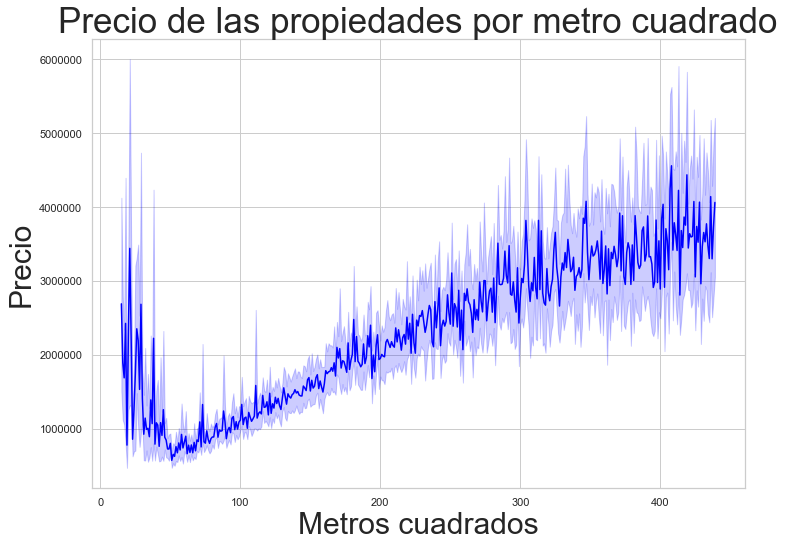

In [16]:
#Relacion metros cuadrados / precio promedio

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

metrosCuadrados_df = zonaprop.groupby(['provincia','metrostotales']).mean()[['precio']].reset_index()
sns.lineplot(x="metrostotales", y="precio", data=metrosCuadrados_df, color='blue')
ax = plt.gca()
ax.set_title("Precio de las propiedades por metro cuadrado", fontsize=35)
ax.set_xlabel("Metros cuadrados",fontsize=30)
ax.set_ylabel("Precio", fontsize=30)

Text(0, 0.5, 'Cantidad de metros cuadrados')

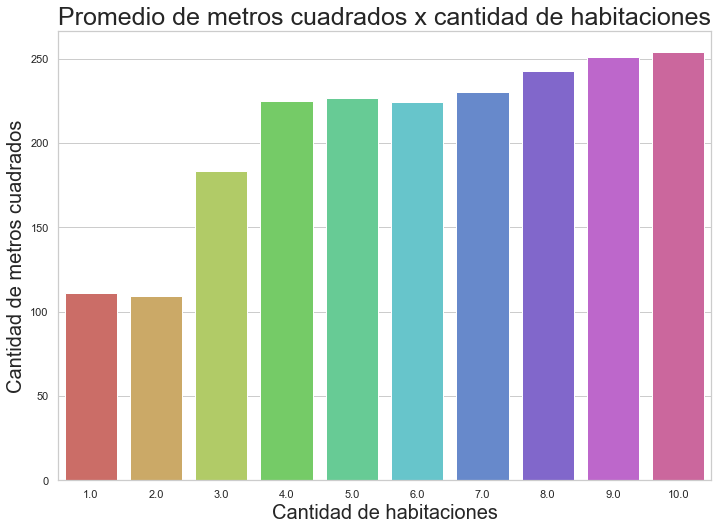

In [17]:
metrosCuadrados_df = zonaprop.groupby(['habitaciones']).mean()[['metrostotales']].reset_index()

# Tamaño para hojas A4.

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.barplot(x="habitaciones", y="metrostotales", data=metrosCuadrados_df, palette="hls")
g.set_title("Promedio de metros cuadrados x cantidad de habitaciones", fontsize=25)
g.set_xlabel("Cantidad de habitaciones", fontsize=20)
g.set_ylabel("Cantidad de metros cuadrados", fontsize=20)

In [18]:
zonaprop['ciudad'].value_counts()

Querétaro                              12646
Benito Juárez                          11014
Zapopan                                10360
San Luis Potosí                         7925
Mérida                                  7162
Monterrey                               6946
Alvaro Obregón                          6633
Cuauhtémoc                              6614
Naucalpan de Juárez                     6554
Miguel Hidalgo                          5795
Atizapán de Zaragoza                    5783
Tlalpan                                 5721
Huixquilucan                            5718
Coyoacán                                5293
Puebla                                  4636
Guadalajara                             4006
San Andrés Cholula                      3805
Cancún                                  3779
Cuernavaca                              3775
Chihuahua                               3757
Tlalnepantla de Baz                     3588
Cuautitlán Izcalli                      3408
Tlajomulco

Text(0, 0.5, 'Precio (en millones de pesos)')

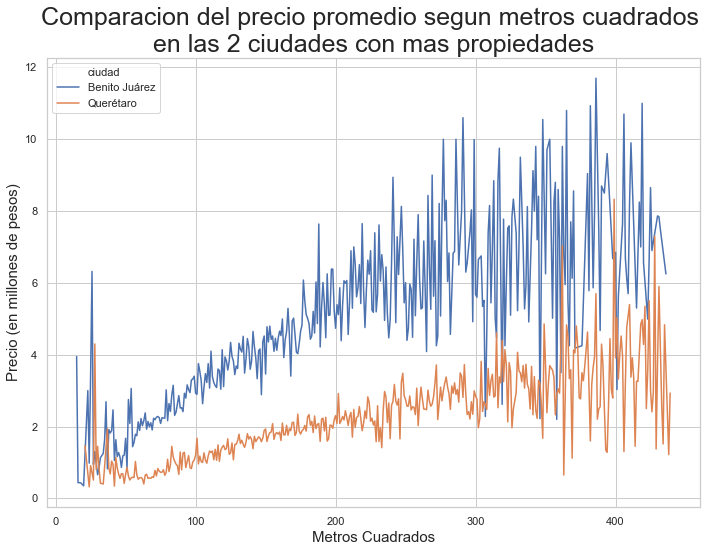

In [4]:
zonasMasPopulares = list(["Querétaro", "Benito Juárez"])
zonasPopulares = zonaprop[zonaprop['ciudad'].isin(zonasMasPopulares)]
zonasPopulares = zonasPopulares.groupby(['ciudad', 'metrostotales']).mean()[['precio']].reset_index()
zonasPopulares['precio'] = zonasPopulares['precio']/1000000

#Relacion metros cuadrados / precio promedio en las 2 ciudades con mas propiedades publicadas

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.lineplot(x="metrostotales", y="precio", data=zonasPopulares, hue="ciudad", color='blue')
ax = plt.gca()
ax.set_title("Comparacion del precio promedio segun metros cuadrados \nen las 2 ciudades con mas propiedades", fontsize=25)
ax.set_xlabel("Metros Cuadrados",fontsize=15)
ax.set_ylabel("Precio (en millones de pesos)", fontsize=15)

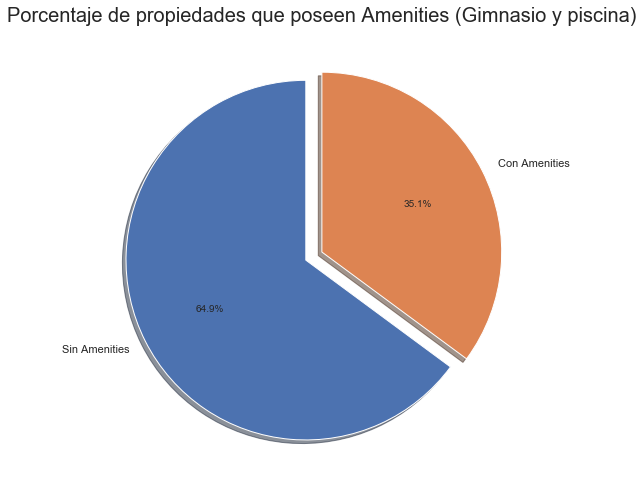

In [21]:
#Obtenemos las cantidades de propiedades con gimnasio
conAmenities = (zonaprop[zonaprop['gimnasio'] == 1])
conAmenities = (conAmenities[conAmenities['piscina'] == 1]).piscina.count()
sinAmenities = (zonaprop[zonaprop['gimnasio'] == 0])
sinAmenities = (sinAmenities[sinAmenities['piscina'] == 1]).piscina.count()


sizes = [sinAmenities, conAmenities]
nombres = ['Sin Amenities','Con Amenities']

# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Porcentaje de propiedades que poseen Amenities (Gimnasio y piscina)', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
plt.show()

Text(0, 0.5, 'Precio (en millones de pesos)')

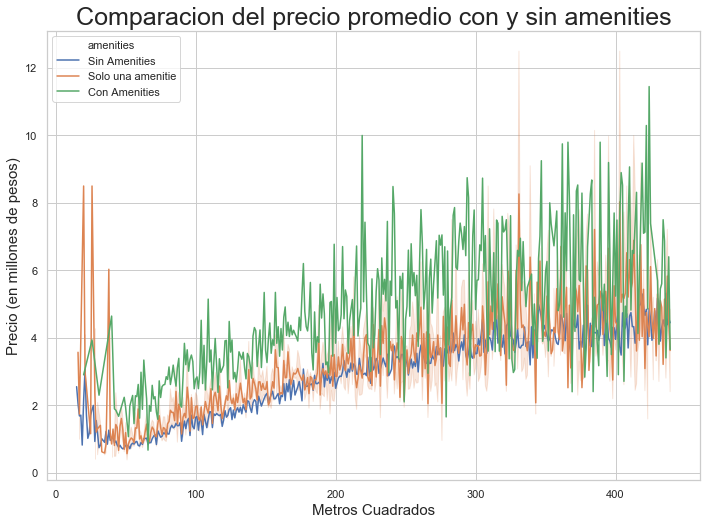

In [23]:
amenities_df = zonaprop.groupby(['metrostotales','gimnasio', 'piscina']).mean()[['precio']].reset_index()
amenities_df['ambas'] = amenities_df['gimnasio'] + amenities_df['piscina']
amenities_df['amenities'] = 'Sin Amenities'
amenities_df.loc[amenities_df['ambas'] == 1,'amenities'] = 'Solo una amenitie'
amenities_df.loc[amenities_df['ambas'] == 2,'amenities'] = 'Con Amenities'

amenities_df['precio'] = amenities_df['precio']/1000000

#Relacion metros cuadrados / precio promedio entre propiedades con y sin amenities

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.lineplot(x="metrostotales", y="precio", data=amenities_df, hue="amenities", color='blue')
ax = plt.gca()
ax.set_title("Comparacion del precio promedio con y sin amenities", fontsize=25)
ax.set_xlabel("Metros Cuadrados",fontsize=15)
ax.set_ylabel("Precio (en millones de pesos)", fontsize=15)

Text(0, 0.5, 'Precio (en millones de pesos)')

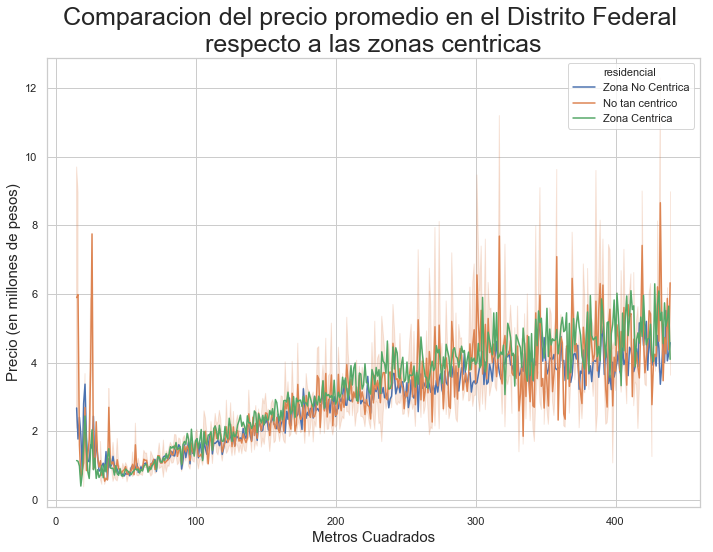

In [24]:
zonaresidencial_df = zonaprop['provincia']
zonaresidencial_df = zonaprop.loc[zonaprop['provincia'] == "Distrito Federal"]
zonaresidencial_df

zonaresidencial_df = zonaprop.groupby(['metrostotales','escuelascercanas', 'centroscomercialescercanos']).mean()[['precio']].reset_index()
zonaresidencial_df['ambas'] = zonaresidencial_df['escuelascercanas'] + zonaresidencial_df['centroscomercialescercanos']
zonaresidencial_df['residencial'] = 'Zona No Centrica'
zonaresidencial_df.loc[zonaresidencial_df['ambas'] == 1,'residencial'] = 'No tan centrico'
zonaresidencial_df.loc[zonaresidencial_df['ambas'] == 2,'residencial'] = 'Zona Centrica'

zonaresidencial_df['precio'] = zonaresidencial_df['precio']/1000000

#Relacion metros cuadrados / precio promedio zonas centricas del Distrito Federal

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.lineplot(x="metrostotales", y="precio", data=zonaresidencial_df, hue="residencial", color='blue')
ax = plt.gca()
ax.set_title("Comparacion del precio promedio en el Distrito Federal \nrespecto a las zonas centricas", fontsize=25)
ax.set_xlabel("Metros Cuadrados",fontsize=15)
ax.set_ylabel("Precio (en millones de pesos)", fontsize=15)